# Datasets for Student projects

In this file, we prepare simplified datasets for student exercises based on the galaxy zoo - the galaxy challenge competition on kaggle
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge

In the galaxy zoo project, participants are shown galaxy images and asked questions about the morphology of the central galaxy. 
Depending on their answer, they are asked the next question, which results in a complicated hierarchy of labels, which can be seen here
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/overview/the-galaxy-zoo-decision-tree



This dataset contains about 60,000 RGB images of galaxies together with a label vector of 37 dimensions.
These labels correspond to answers given to 11 Questions. Each label is a number between 0 and 1 and shows the amount of participants who gave this answer relative to the number of participants that saw the given image.
The galaxy challenge asks competitors to provide a model that reproduces these labels.


In order to run this notebook, you have to download and extract the dataset (images: images_training_rev1.zip, labels: training_solutions_rev1.zip) from here
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/data

Note that the image files have 424x424 pixels, while the galaxies are contained within the central 207x207 pixels. It is useful to crop the central part and reduce to 64x64 pixels.

In [35]:
## file locations
image_folder = "data/images/images_training_rev1/"
labels_file = "data/training_solutions_rev1.csv"

In [36]:
from glob import glob
import shutil
import os
import pandas as pd
import torch
###added some extra imports based on DataLoader.ipynb
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from utils import trim_file_list, img_label, CustomDataset



def get_labels_train(file_galaxy_labels) -> torch.Tensor:
    df_galaxy_labels = pd.read_csv(file_galaxy_labels)
    return df_galaxy_labels


target_labels = get_labels_train(labels_file)


class GalaxyZooDataset(Dataset):
    def __init__(self):
        file_list = glob(image_folder + "*")
        file_list.sort()
        file_list = [f.replace("\\", "/") for f in file_list]
        self.data = [[file, label.values] for file, (_, label) in zip(file_list, target_labels.iterrows())]

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]
    

dataset = GalaxyZooDataset()

data_loader_original = DataLoader(dataset, batch_size=8, shuffle=False, drop_last=False)
    

In [37]:
target_labels ## the labels correspond to images GalaxyID.jpg

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [38]:
### used to check for any null values in the labels
print(target_labels.isnull().sum())

GalaxyID     0
Class1.1     0
Class1.2     0
Class1.3     0
Class2.1     0
Class2.2     0
Class3.1     0
Class3.2     0
Class4.1     0
Class4.2     0
Class5.1     0
Class5.2     0
Class5.3     0
Class5.4     0
Class6.1     0
Class6.2     0
Class7.1     0
Class7.2     0
Class7.3     0
Class8.1     0
Class8.2     0
Class8.3     0
Class8.4     0
Class8.5     0
Class8.6     0
Class8.7     0
Class9.1     0
Class9.2     0
Class9.3     0
Class10.1    0
Class10.2    0
Class10.3    0
Class11.1    0
Class11.2    0
Class11.3    0
Class11.4    0
Class11.5    0
Class11.6    0
dtype: int64


In [39]:
### some additional imports to help me with cropping the image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as transform_functional
from PIL import Image

In [40]:
### defined the transformation for the images
### first crops the center 207x207 pixels, then resizes down to 64x64
transform = transforms.Compose([
    transforms.CenterCrop(207),
    transforms.Resize((64,64)),
    transforms.ToTensor()
])


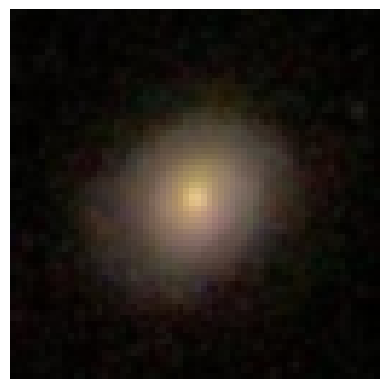

<Figure size 640x480 with 0 Axes>

In [41]:
### example cropping of the first image
path, vals = dataset[0]
img = transform(Image.open(path))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.show()
plt.savefig("example_cropped_image.png", bbox_inches="tight")

In [42]:
#applying the transformation to all images in the dataset
#and saving the transformed images in a new folder

##commented out so I don't accidentally run it again, it took 15 minutes

image_paths = glob(image_folder + "*.jpg")
output_folder = "data/images/transformed_images/"
os.makedirs(output_folder, exist_ok=True)
to_pil = transforms.ToPILImage()
transformed_imgs = []
for path in image_paths:
    img = transform(Image.open(path))
    transformed_imgs.append(img)

    img_pil = to_pil(img)
    filename = os.path.basename(path)
    img_pil.save(os.path.join(output_folder, filename))

In [43]:
#checking real quick the images were transformed properly
print(len(transformed_imgs))

#image folder, dataset, and data loader original redefined so I use the transformed images
image_folder = "data/images/transformed_images/"
dataset = GalaxyZooDataset()
data_loader_original = DataLoader(dataset, batch_size=8, shuffle=False, drop_last=False)

61578


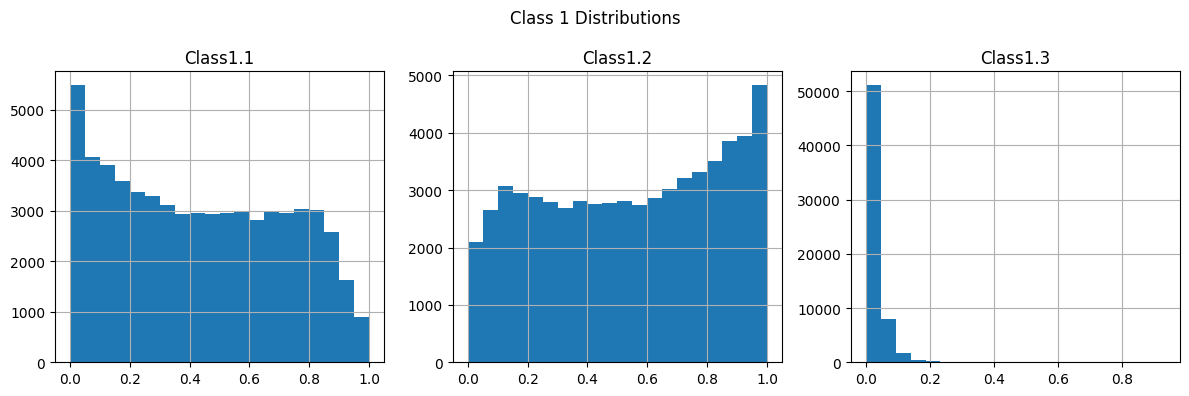

<Figure size 640x480 with 0 Axes>

In [44]:
### The next several blocks was to help me visualize the distributions for all the classes that will be worked on for the next 

target_labels[["Class1.1", "Class1.2", "Class1.3"]].hist(bins=20, figsize=(12, 4), layout=(1, 3))
plt.suptitle("Class 1 Distributions")
plt.tight_layout()
plt.show()
plt.savefig("class1_distributions.png")

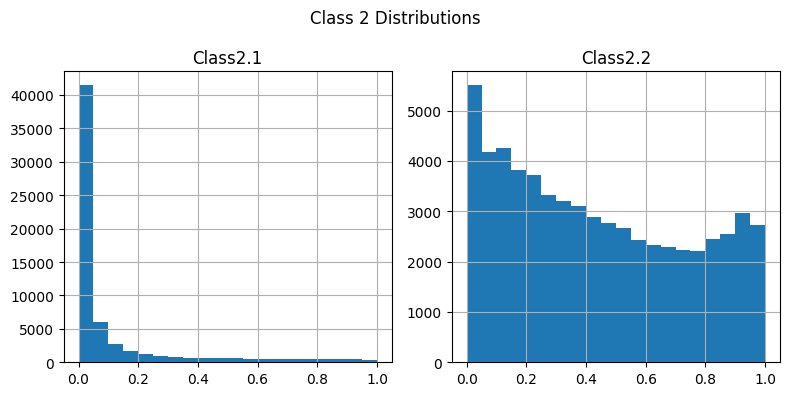

<Figure size 640x480 with 0 Axes>

In [45]:
target_labels[["Class2.1", "Class2.2"]].hist(bins=20, figsize=(8, 4), layout=(1, 2))
plt.suptitle("Class 2 Distributions")
plt.tight_layout()
plt.show()
plt.savefig("class2_distributions.png")

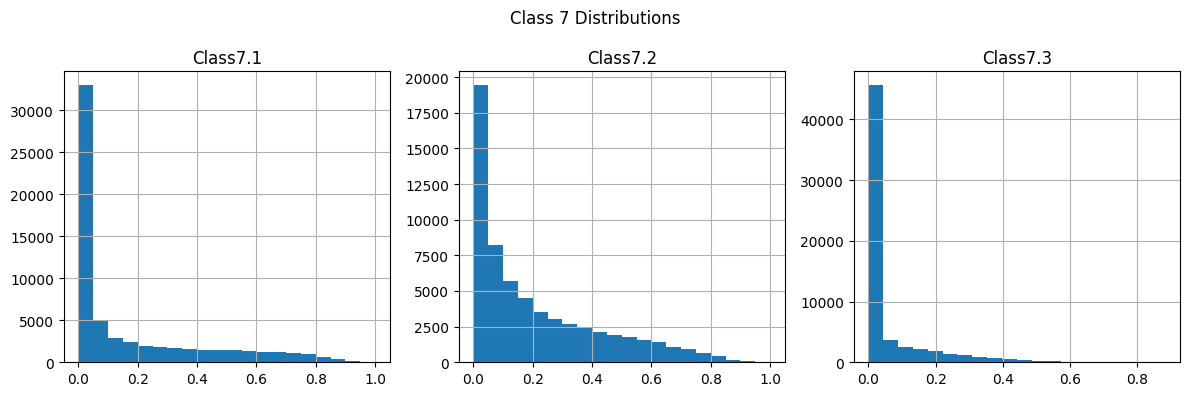

<Figure size 640x480 with 0 Axes>

In [46]:
target_labels[["Class7.1", "Class7.2", "Class7.3"]].hist(bins=20, figsize=(12, 4), layout=(1, 3))
plt.suptitle("Class 7 Distributions")
plt.tight_layout()
plt.show()
plt.savefig("class7_distributions.png")

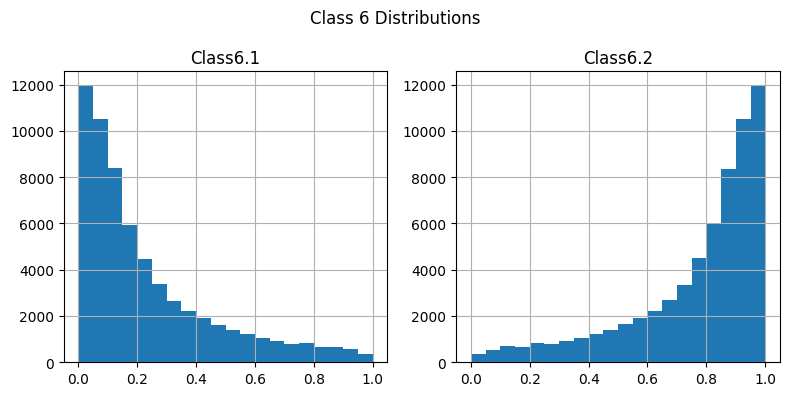

<Figure size 640x480 with 0 Axes>

In [47]:
target_labels[["Class6.1", "Class6.2"]].hist(bins=20, figsize=(8, 4), layout=(1, 2))
plt.suptitle("Class 6 Distributions")
plt.tight_layout()
plt.show()
plt.savefig("class6distributions.png")

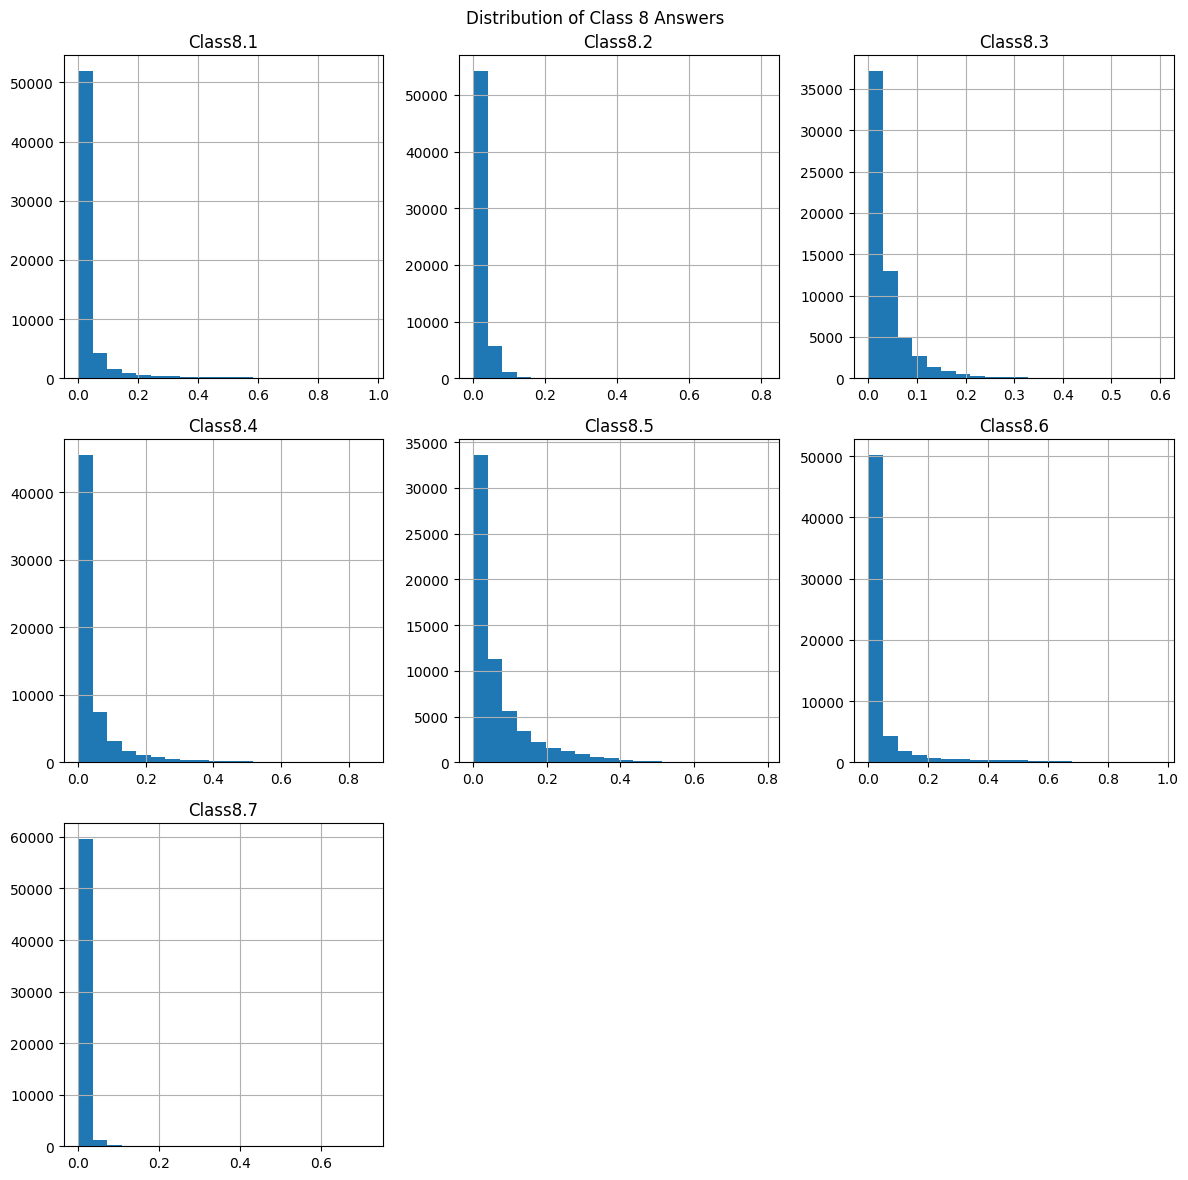

<Figure size 640x480 with 0 Axes>

In [48]:
target_labels[["Class8.1", "Class8.2", "Class8.3", "Class8.4", "Class8.5", "Class8.6", "Class8.7"]].hist(bins=20, figsize=(12, 12), layout=(3, 3))
plt.suptitle("Distribution of Class 8 Answers")
plt.tight_layout()
plt.show()
plt.savefig("class8_distributions.png")

## First Exercise

In the first exercise, we only consider the top-level question (3 answers) and samples where at least 80 % of participants gave the same answer.
We assume this to be a certain classification and transform them to one-hot encoded labels.
The task is to provide a classifier that correctly classifies the images.

In [187]:
## loop through files
## check for condition (max of first three labels is >= 0.8)
## if true, create hot-encoded label
## copy file to folder
## save all labels in csv file

folder_1 = "data/exercise_1/"
folder_images_1 = folder_1 + "images/"
file_labels_1 = folder_1 + "labels.csv"

def condition(label):
    """ for (N,L)-tensor of labels (float: 0-1) return (N,1)-boolean-tensor 
    with True if one of first three floats is >= 0.8 """
    ground = label[:,1:4] >= 0.8
    return torch.sum(ground, dim=1).bool() #, keepdims=True)

files_1 = []
labels_1 = []

for files, label in data_loader_original:
    cond = condition(label)
    files_1 += [f for f, c in zip(files, cond) if c]
    labels_1 += [torch.round(label[torch.where(cond)[0],:4])]

labels_1 = torch.cat(labels_1)
labels_1 = pd.DataFrame(labels_1.numpy(), columns=target_labels.columns[:4])

os.makedirs(folder_images_1, exist_ok=True)

[shutil.copy(file, folder_images_1 + file.split('/')[-1]) for file in files_1]
    
labels_1.to_csv('data/exercise_1/labels')
labels_1.to_csv('data/exercise_1/labels.csv')

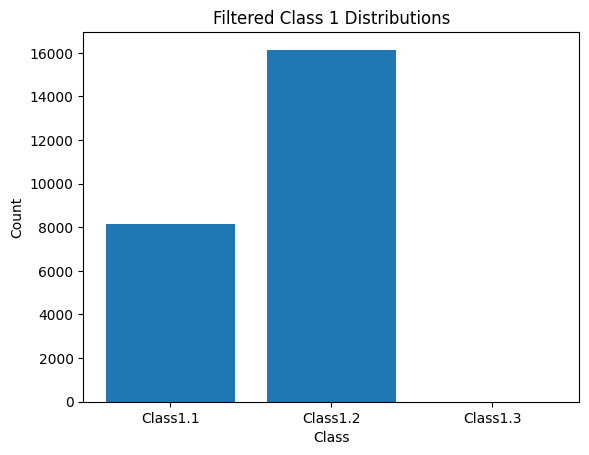

<Figure size 640x480 with 0 Axes>

In [188]:
#making a histogram of the filtered labels
labels_1_hist = pd.read_csv('data/exercise_1/labels.csv', index_col=0)
hist_1 = labels_1_hist[["Class1.1", "Class1.2", "Class1.3"]].sum()
plt.bar(hist_1.index, hist_1.values)
plt.title("Filtered Class 1 Distributions")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
plt.savefig("filtered_class_1_distributions.png")

In [189]:
print(labels_1_hist["Class1.3"].sum())
print(len(glob("data/exercise_1/images/*.jpg")))

2.0
24275


In [190]:
labels_1.to_csv('data/exercise_1/labels.csv')

In [191]:
labels_1 = pd.read_csv('data/exercise_1/labels.csv', index_col=0)

# Find rows where Class1.3 == 1 (i.e., class 1.3 images)
mask = labels_1["Class1.3"] != 1

# Filter out class 1.3 images
labels_filtered = labels_1[mask]

# Save the filtered labels
labels_filtered.to_csv('data/exercise_1/labels_no_class13.csv')

In [192]:
labels = pd.read_csv('data/exercise_1/labels_no_class13.csv')
image_folder = "data/exercise_1/images"

# Get the set of valid image filenames (as strings)
valid_images = set(labels['GalaxyID'].astype(int).astype(str) + ".jpg")

# Remove any image in the folder not in the filtered CSV
for fname in os.listdir(image_folder):
    if fname.endswith(".jpg") and fname not in valid_images:
        os.remove(os.path.join(image_folder, fname))

In [193]:
print(len(glob("data/exercise_1/images/*.jpg")))

24273


In [194]:
labels = pd.read_csv('data/exercise_1/labels_no_class13.csv')
print(labels[["Class1.1", "Class1.2"]].idxmax(axis=1).value_counts())

Class1.2    16141
Class1.1     8132
Name: count, dtype: int64


In [195]:
class GalaxyZooExercise1Dataset(Dataset):
    def __init__(self, images_folder, labels_csv, transform=None):
        self.labels = pd.read_csv(labels_csv)  # Do NOT use index_col=0
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = str(self.labels['GalaxyID'].iloc[idx].astype(int)) + ".jpg"
        img_path = f"{self.images_folder}/{img_name}"
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        label = self.labels.iloc[idx, 2:4].values.astype('float32')
        return image, label

In [198]:
from torch.utils.data import random_split, DataLoader

In [199]:
class GalaxyZooExercise1Dataset(Dataset):
    def __init__(self, images_folder, labels_csv, transform=None):
        self.labels = pd.read_csv(labels_csv)  # Do NOT use index_col=0
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = str(self.labels['GalaxyID'].iloc[idx].astype(int)) + ".jpg"
        img_path = f"{self.images_folder}/{img_name}"
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        label = self.labels.iloc[idx, 2:4].values.astype('float32')
        return image, label
    
dataset = GalaxyZooExercise1Dataset(
    images_folder="data/exercise_1/images",
    labels_csv="data/exercise_1/labels_no_class13.csv",
    transform=transform
)

val_size = int(0.2 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
#weighted_train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [200]:
import torch.nn as nn

class SimpleGalaxyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),  # 3 channels for RGB
            nn.ReLU(),
            nn.MaxPool2d(2),  # 64x64 -> 32x32
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32x32 -> 16x16
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 16 * 16, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # 2 classes
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

In [201]:
for X, y in train_loader:
    y_class = y.argmax(dim=1)
    print(y_class)
    break  # Remove this break to see more batches

tensor([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


In [202]:
def train_one_epoch(model, loader, optimizer, loss_fn, device="cpu"):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for X, y in loader:
        X, y = X.to(device), y.to(device)
        y_class = y.argmax(dim=1)
        pred = model(X)
        loss = loss_fn(pred, y_class)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (pred.argmax(dim=1) == y_class).sum().item()
        total += y.size(0)
    return total_loss / len(loader), correct / total

In [203]:
def validate(model, loader, loss_fn, device="cpu"):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            y_class = y.argmax(dim=1)
            pred = model(X)
            loss = loss_fn(pred, y_class)
            total_loss += loss.item()
            correct += (pred.argmax(dim=1) == y_class).sum().item()
            total += y.size(0)
    return total_loss / len(loader), correct / total

In [204]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleGalaxyCNN().to(device)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(30):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, loss_fn, device=device)
    val_loss, val_acc = validate(model, val_loader, loss_fn, device=device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

Epoch 1: Train Loss=0.3796, Val Loss=0.2283, Train Acc=0.8449, Val Acc=0.9155
Epoch 2: Train Loss=0.2180, Val Loss=0.2183, Train Acc=0.9182, Val Acc=0.9133
Epoch 3: Train Loss=0.1925, Val Loss=0.1728, Train Acc=0.9269, Val Acc=0.9351
Epoch 4: Train Loss=0.1820, Val Loss=0.1643, Train Acc=0.9313, Val Acc=0.9413
Epoch 5: Train Loss=0.1683, Val Loss=0.1528, Train Acc=0.9372, Val Acc=0.9446
Epoch 6: Train Loss=0.1581, Val Loss=0.2233, Train Acc=0.9401, Val Acc=0.9141
Epoch 7: Train Loss=0.1534, Val Loss=0.1504, Train Acc=0.9428, Val Acc=0.9460
Epoch 8: Train Loss=0.1436, Val Loss=0.1570, Train Acc=0.9479, Val Acc=0.9425
Epoch 9: Train Loss=0.1405, Val Loss=0.1585, Train Acc=0.9477, Val Acc=0.9448
Epoch 10: Train Loss=0.1293, Val Loss=0.1348, Train Acc=0.9516, Val Acc=0.9516
Epoch 11: Train Loss=0.1221, Val Loss=0.1256, Train Acc=0.9549, Val Acc=0.9557
Epoch 12: Train Loss=0.1200, Val Loss=0.1287, Train Acc=0.9558, Val Acc=0.9551
Epoch 13: Train Loss=0.1169, Val Loss=0.1540, Train Acc=0.955

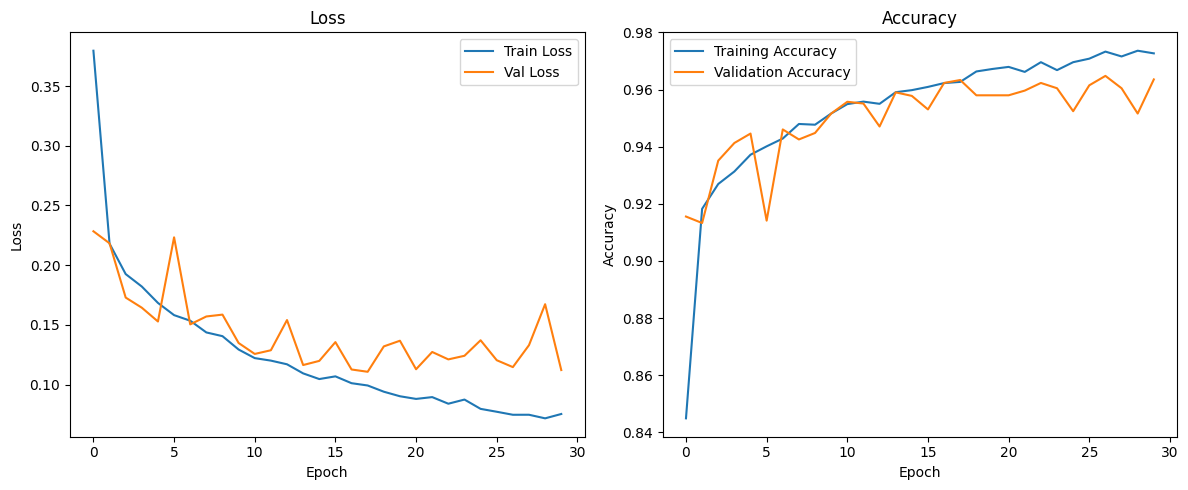

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(train_accs, label="Training Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.tight_layout()
plt.show()
plt.savefig("training_validation_loss_accuracy.png")

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for X, y in loader:
            y_class = y.argmax(dim=1)
            preds = model(X).argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(y_class.cpu().numpy())
    acc = accuracy_score(all_targets, all_preds)
    cm = confusion_matrix(all_targets, all_preds)
    report = classification_report(all_targets, all_preds, target_names=["Class1.1", "Class1.2"])
    return acc, cm, report

# After training:
acc, cm, report = evaluate(model, train_loader)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.9787830099287274
Confusion Matrix:
 [[ 7733   399]
 [  116 16025]]
Classification Report:
               precision    recall  f1-score   support

    Class1.1       0.99      0.95      0.97      8132
    Class1.2       0.98      0.99      0.98     16141

    accuracy                           0.98     24273
   macro avg       0.98      0.97      0.98     24273
weighted avg       0.98      0.98      0.98     24273



In [ ]:
# count_1_1 = 8132
# count_1_2 = 16141
# total = count_1_1 + count_1_2

# weight_1_1 = total / (2 * count_1_1)
# weight_1_2 = total / (2 * count_1_2)
# class_weights = torch.tensor([weight_1_1, weight_1_2], dtype=torch.float32)

# weighted_loss_fn = nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
# weighted_losses = []
# weighted_model = SimpleGalaxyCNN()
# weighted_optimizer = torch.optim.Adam(weighted_model.parameters())
# for epoch in range(30):
#     weighted_loss = train_one_epoch(weighted_model, weighted_train_loader, weighted_optimizer, weighted_loss_fn)
#     print(f"Epoch {epoch+1}, Loss: {weighted_loss:.4f}")
#     weighted_losses.append(weighted_loss)

Epoch 1, Loss: 0.4127
Epoch 2, Loss: 0.2731
Epoch 3, Loss: 0.2310
Epoch 4, Loss: 0.2035
Epoch 5, Loss: 0.1919
Epoch 6, Loss: 0.1829
Epoch 7, Loss: 0.1722
Epoch 8, Loss: 0.1609
Epoch 9, Loss: 0.1561
Epoch 10, Loss: 0.1474
Epoch 11, Loss: 0.1402
Epoch 12, Loss: 0.1394
Epoch 13, Loss: 0.1314
Epoch 14, Loss: 0.1257
Epoch 15, Loss: 0.1218
Epoch 16, Loss: 0.1236
Epoch 17, Loss: 0.1177
Epoch 18, Loss: 0.1116
Epoch 19, Loss: 0.1087
Epoch 20, Loss: 0.1058
Epoch 21, Loss: 0.1033
Epoch 22, Loss: 0.1003
Epoch 23, Loss: 0.0975
Epoch 24, Loss: 0.0956
Epoch 25, Loss: 0.0940
Epoch 26, Loss: 0.0913
Epoch 27, Loss: 0.0908
Epoch 28, Loss: 0.0862
Epoch 29, Loss: 0.0825
Epoch 30, Loss: 0.0833


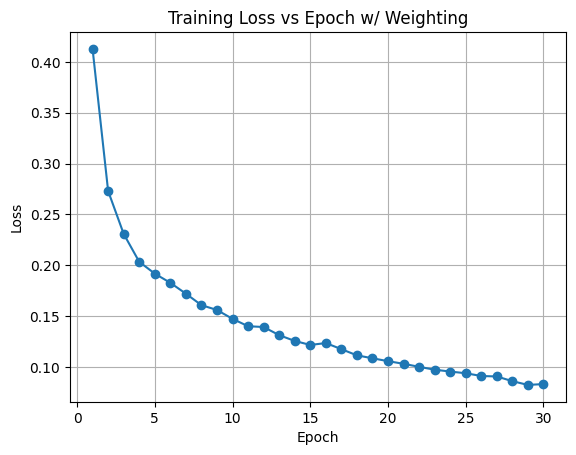

<Figure size 640x480 with 0 Axes>

In [ ]:
# plt.plot(range(1, 31), weighted_losses, marker='o')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("Training Loss vs Epoch w/ Weighting")
# plt.grid()
# plt.show()
# plt.savefig("weighted_training_loss_vs_epoch_no13.png")

In [ ]:
# acc, cm, report = evaluate(weighted_model, weighted_train_loader)
# print("Weighted Model Accuracy:", acc)
# print("Weighted Model Confusion Matrix:\n", cm)
# print("Weighted Model Classification Report:\n", report)

Weighted Model Accuracy: 0.9760639393564866
Weighted Model Confusion Matrix:
 [[ 7839   293]
 [  288 15853]]
Weighted Model Classification Report:
               precision    recall  f1-score   support

    Class1.1       0.96      0.96      0.96      8132
    Class1.2       0.98      0.98      0.98     16141

    accuracy                           0.98     24273
   macro avg       0.97      0.97      0.97     24273
weighted avg       0.98      0.98      0.98     24273



## Second Exercise

In the second exercise, we consider the second layer of questions, i. e. Q2 and Q7.
Here, we do not use one-hot encoded labels, but the original floats that range between 0 and 1, thus making the classification problem a regression problem.
Here we can use all images in the dataset (no separate copy is produced).
Students should take care that the output of their classifier has to match the hierarchical structure of questions, e. g. the the summed values for Q2 equal the value for answer Q1.1.

In [235]:
folder_2 = "data/exercise_2/"
file_labels_2 = folder_2 + "labels.csv"

def select_questions(*questions):
    col = target_labels.columns
    result = [col[0]]
    for q in questions:
        result += [c for c in col if f"Class{q}." in c]
    return result

os.makedirs(folder_2, exist_ok=True)

labels_2 = target_labels[select_questions(1,2,7)]
labels_2.to_csv(file_labels_2)
labels_2

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class7.1,Class7.2,Class7.3
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.201463,0.181684,0.000000
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.000000,0.135082,0.191919
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.741864,0.023853
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.408599,0.284778,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.494587,0.439252,0.000000
...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.410816,0.099563
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.404841,0.496375,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.030477,0.172364,0.000000
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.045500,0.045500,0.000000


In [236]:
file_labels_2

'data/exercise_2/labels.csv'

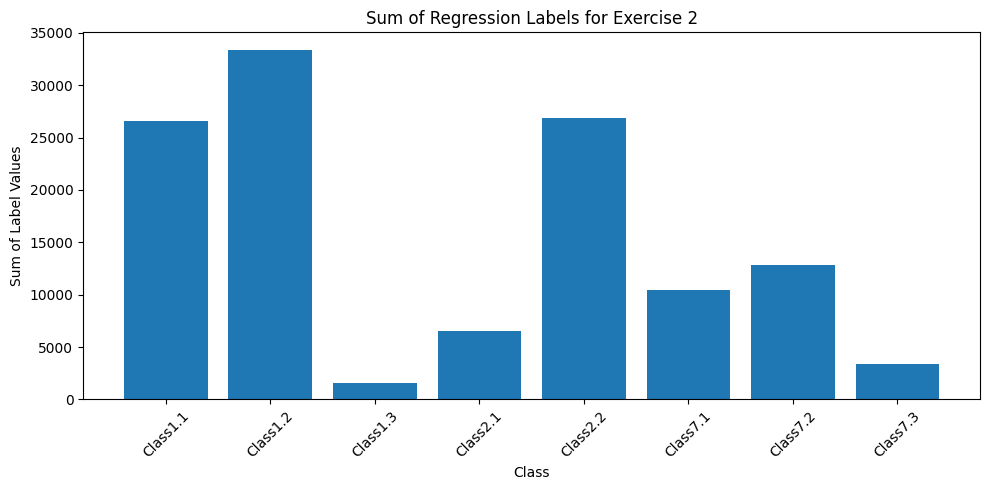

<Figure size 640x480 with 0 Axes>

In [237]:

labels2 = pd.read_csv("data/exercise_2/labels.csv")

# Sum each class column (skip GalaxyID)
class_cols = labels2.columns[2:]  # all except GalaxyID
class_sums = labels2[class_cols].sum()

plt.figure(figsize=(10, 5))
plt.bar(class_sums.index, class_sums.values)
plt.title("Sum of Regression Labels for Exercise 2")
plt.xlabel("Class")
plt.ylabel("Sum of Label Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("exercise2_label_sums.png")

In [238]:
labels = pd.read_csv("data/training_solutions_rev1.csv")

selected_cols = [
    "GalaxyID",
    "Class1.1", "Class1.2",
    "Class2.1", "Class2.2",
    "Class7.1", "Class7.2", "Class7.3"
]
labels_regression = labels[selected_cols]
labels_regression.to_csv("data/exercise_2/labels.csv", index=False)

In [239]:
labels2 = pd.read_csv("data/exercise_2/labels.csv")

# Show the first few rows
print(labels2.head())

# Show the shape (should be [num_samples, 8])
print("Shape:", labels2.shape)

# Show the column names
print("Columns:", labels2.columns.tolist())

   GalaxyID  Class1.1  Class1.2  Class2.1  Class2.2  Class7.1  Class7.2  \
0    100008  0.383147  0.616853  0.000000  0.616853  0.201463  0.181684   
1    100023  0.327001  0.663777  0.031178  0.632599  0.000000  0.135082   
2    100053  0.765717  0.177352  0.000000  0.177352  0.000000  0.741864   
3    100078  0.693377  0.238564  0.000000  0.238564  0.408599  0.284778   
4    100090  0.933839  0.000000  0.000000  0.000000  0.494587  0.439252   

   Class7.3  
0  0.000000  
1  0.191919  
2  0.023853  
3  0.000000  
4  0.000000  
Shape: (61578, 8)
Columns: ['GalaxyID', 'Class1.1', 'Class1.2', 'Class2.1', 'Class2.2', 'Class7.1', 'Class7.2', 'Class7.3']


In [240]:
class GalaxyZooRegressionDataset(Dataset):
    def __init__(self, images_folder, labels_csv, transform=None):
        self.labels = pd.read_csv(labels_csv)
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = str(self.labels['GalaxyID'].iloc[idx]) + ".jpg"
        img_path = f"{self.images_folder}/{img_name}"
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        # Return all 7 relevant labels as float32 (skip GalaxyID)
        label = self.labels.iloc[idx, 1:8].values.astype('float32')
        return image, label

In [241]:
class GalaxyZooRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 16 * 16, 64),
            nn.ReLU(),
            nn.Linear(64, 5),  # 5 regression outputs
            nn.Sigmoid()       # constrain outputs to [0,1]
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

In [242]:
def regression_loss(pred, target):
    # pred: [batch, 5] (Class2.1, Class2.2, Class7.1, Class7.2, Class7.3)
    # target: [batch, 7] (Class1.1, Class1.2, Class2.1, Class2.2, Class7.1, Class7.2, Class7.3)
    mse = nn.MSELoss()
    # Standard regression loss
    loss = mse(pred, target[:, 2:])  # compare only regression outputs
    # Constraint: Class2.1 + Class2.2 == Class1.2
    q2_sum = pred[:, 0] + pred[:, 1]
    q2_target = target[:, 1]  # Class1.2
    loss += ((q2_sum - q2_target) ** 2).mean()
    # Constraint: Class7.1 + Class7.2 + Class7.3 == Class1.1
    q7_sum = pred[:, 2] + pred[:, 3] + pred[:, 4]
    q7_target = target[:, 0]  # Class1.1
    loss += ((q7_sum - q7_target) ** 2).mean()
    return loss

In [243]:
regression_dataset = GalaxyZooRegressionDataset(
    images_folder="data/images/transformed_images/",
    labels_csv="data/exercise_2/labels.csv",
    transform=transform
)
train_loader = DataLoader(regression_dataset, batch_size=32, shuffle=True)

In [ ]:
def train_one_epoch(model, loader, optimizer, loss_fn, device="cpu"):
    model.train()
    total_loss = 0
    for X, y in loader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

val_size = int(0.2 * len(regression_dataset))
train_size = len(regression_dataset) - val_size
train_dataset, val_dataset = random_split(regression_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Validation function
def validate(model, loader, loss_fn, device="cpu"):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            total_loss += loss.item()
    return total_loss / len(loader)

# Example usage:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GalaxyZooRegressor().to(device)
optimizer = torch.optim.Adam(model.parameters())
# Use your custom regression_loss defined earlier
train_losses = []
val_losses = []

for epoch in range(30):
    train_loss = train_one_epoch(model, train_loader, optimizer, regression_loss, device=device)
    val_loss = validate(model, val_loader, regression_loss, device=device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.tight_layout()
plt.show()
plt.savefig("regression_training_validation_loss.png")

In [ ]:
# # for debugging
# for X, y in train_loader:
#     print("Image batch shape:", X.shape)
#     print("Label batch shape:", y.shape)
#     print("First label row:", y[0])
#     break

Image batch shape: torch.Size([32, 3, 64, 64])
Label batch shape: torch.Size([32, 7])
First label row: tensor([0.0098, 0.9754, 0.0000, 0.9754, 0.0000, 0.0098, 0.0000])


## Third Exercise

In the third exercise, we further include questions Q6 and Q8 regarding oddities.
The students have to improve their architectures in order to correctly classify rare object classes.
Again, all images can be used.

In [10]:
folder_3 = "data/exercise_3/"
file_labels_3 = folder_3 + "labels.csv"

!mkdir -p $folder_3

labels_3 = target_labels[select_questions(1,2,6,7,8)]
labels_3.to_csv(file_labels_3)
labels_3

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027227,0.000000,0.027227,0.000000,0.000000,0.000000
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000
